### 2022-1 Artificial Intelligence (01)
## Live Session #1-1: Perceptron from the scratch
---
Copyright (c) Prof. Jaehyeong Sim 

Department of Computer Science and Engineering

Ewha Womans University

In [1]:
import numpy as np

ModuleNotFoundError: No module named 'numpy'

In [ ]:
def step_func(x):
  return np.where(x>=0.5, 1, 0)

In [ ]:
class Perceptron:

  def __init__(self, learning_rate=0.01, n_epochs=5):
    self.lr = learning_rate
    self.n_epochs = n_epochs
    self.activation_func = step_func
    self.weights = None
    self.bias = None
    self.weight_history = []
    self.bias_history = []

  def fit(self, X, y):
    n_samples, n_features = X.shape

    np.random.seed(42)
    self.weights = np.random.random(n_features)
    self.bias = 0

    self.weight_history.append(self.weights)
    self.bias_history.append(self.bias)

    for _ in range(self.n_epochs):
      for idx, sample in enumerate(X):
        a = np.dot(sample, self.weights) + self.bias
        y_pred = self.activation_func(a)
        wgrad = (y_pred - y[idx]) * sample
        bgrad = (y_pred - y[idx])
        self.weights = self.weights - self.lr * wgrad
        self.bias = self.bias - self.lr * bgrad

    self.weight_history.append(self.weights)
    self.bias_history.append(self.bias)

  def predict(self, X):
    a = np.dot(X, self.weights) + self.bias
    y_pred = self.activation_func(a)
    return y_pred

In [ ]:
n_epochs=10000
neuron = Perceptron(learning_rate=1e-3, n_epochs=n_epochs)
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y = np.array([0.0, 0.0, 0.0, 1.0])
neuron.fit(X, y)

In [ ]:
y_pred = neuron.predict(X)
print(y_pred)

[[0 0]
 [1 0]
 [0 1]
 [1 1]]
[0 0 0 1]


[0.37454012 0.95071431]
0
[0.37454012 0.72471431]
-0.22600000000000017


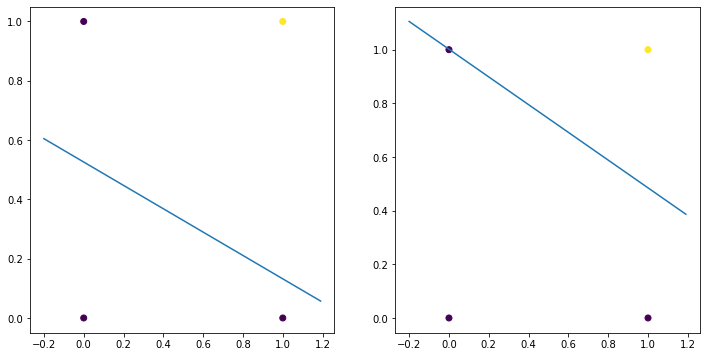

In [ ]:
import math
import matplotlib.pyplot as plt

x0 = np.arange(-0.2,1.2,0.01)

plt.figure(figsize=(12,6))

for i in range(2):
  plt.subplot(1,2,i+1)
  x1 = -neuron.weight_history[i][0]/neuron.weight_history[i][1]*x0 - neuron.bias_history[i]/neuron.weight_history[i][1] + 0.5/neuron.weight_history[i][1]
  print(neuron.weight_history[i])
  print(neuron.bias_history[i])
  plt.plot(x0,x1)
  plt.scatter(X[:,0],X[:,1],c=y)

plt.show()